<a href="https://colab.research.google.com/github/Bhuto1998/Data-Science-Year-2020/blob/master/Pattern_Recognition_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pattern Recognition Assignment-3
## Name: Arnab Mukherjee (MB1908)

In [1]:
!pip3 install git+https://github.com/jqmviegas/jqm_cvi.git #pre-requisite for jqmcvi library

  Cloning https://github.com/jqmviegas/jqm_cvi.git to /tmp/pip-req-build-y4z66fhk
  Running command git clone -q https://github.com/jqmviegas/jqm_cvi.git /tmp/pip-req-build-y4z66fhk
  Created wheel for jqmcvi: filename=jqmcvi-1.0-cp36-cp36m-linux_x86_64.whl size=239593 sha256=adf6f02ce81d9d224c209c30e9415a392ac2f07f5fefd3c4a19798a756464144
  Stored in directory: /tmp/pip-ephem-wheel-cache-ibpshu2n/wheels/ec/f9/1f/83b6273617be116dc8a6c2af1f0b21a953afb4964b1c593b10
Successfully built jqmcvi


In [26]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.mixture import GaussianMixture
import jqmcvi 
from jqmcvi import base
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
df = pd.read_csv("seeds_dataset.txt",sep="\s+", #or delim_whitespace=True, #separator is whitespace
                 header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
#randomly permute
df = df.sample(frac = 1.0)
df.head()

,0,1,2,3,4,5,6,7
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3
23,12.08,13.23,0.8664,5.099,2.936,1.415,4.961,1
188,11.23,12.82,0.8594,5.089,2.821,7.524,4.957,3
159,11.49,13.22,0.8263,5.304,2.695,5.388,5.310,3


In [6]:
#Creating the new Dataset
df2 = df.iloc[:,[0,1,2,3,4,5,6]]
df2.head()

,0,1,2,3,4,5,6
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132
23,12.08,13.23,0.8664,5.099,2.936,1.415,4.961
188,11.23,12.82,0.8594,5.089,2.821,7.524,4.957
159,11.49,13.22,0.8263,5.304,2.695,5.388,5.310


## Deconvolution of Mixture of Gaussian Densities via EM algorithm

In [7]:
#Silhouette Index
s_val = []
for k in range(10):
  model = GaussianMixture(n_components=(k+2), init_params='random')
  model.fit(df2)
  yhat = model.predict(df2)
  s = sk.metrics.silhouette_score(df, yhat)
  s_val = s_val + [s]
print("Number of Clusters Predicted: ",np.argmax(s_val)+2)

Number of Clusters Predicted:  2


In [9]:
#Dunn's Index
s_val = []
for k in range(10):
  model = GaussianMixture(n_components=(k+2), init_params='random')
  model.fit(df2)
  yhat = model.predict(df2)
  s = base.dunn_fast(df2, yhat)
  s_val = s_val + [s]
print("Number of Clusters Predicted: ",np.argmax(s_val)+2)

Number of Clusters Predicted:  3


In [23]:
# We will take the dunn's index in this case. It predicts that optimal number of cluster is 3
model = GaussianMixture(n_components=3, init_params='random')
model.fit(df2)
y = model.predict(df2)
df3 = pd.DataFrame(yhat,columns=["y"])
X = pd.concat([df2,df3],axis = 1)

In [24]:
X.head()

,0,1,2,3,4,5,6,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


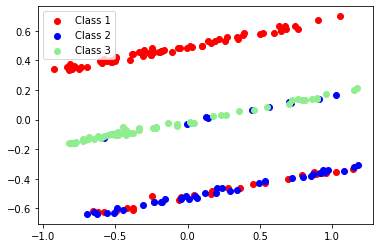

In [25]:
#2D PCA Plots
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

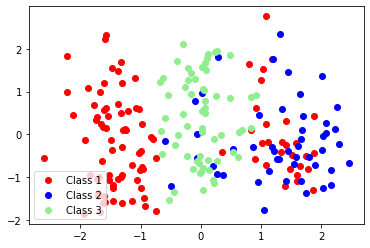

In [28]:
#LDA Plots
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

## K-means Clustering:

In [29]:
from sklearn.cluster import KMeans

In [31]:
#Silhouette Index
s_val = []
for k in range(10):
  model = KMeans((k+2), random_state=0)
  model.fit(df2)
  yhat = model.predict(df2)
  s = sk.metrics.silhouette_score(df, yhat)
  s_val = s_val + [s]
print("Number of Clusters Predicted by Silhouette Index: ",np.argmax(s_val)+2)

#Dunn's Index
s_val = []
for k in range(10):
  model = KMeans((k+2), random_state=0)
  model.fit(df2)
  yhat = model.predict(df2)
  s = base.dunn_fast(df2, yhat)
  s_val = s_val + [s]
print("Number of Clusters Predicted by Dunn's Index: ",np.argmax(s_val)+2)
data = df2.to_numpy()




Number of Clusters Predicted by Silhouette Index:  2
Number of Clusters Predicted by Dunn's Index:  10


In [33]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, temp = optimalK(data, nrefs=5, maxClusters=30)
print("Number of Clusters Predicted by Gap Statistics: ",score_g)

Number of Clusters Predicted by Gap Statistics:  29


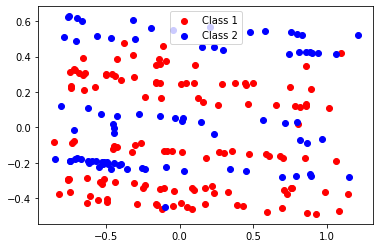

In [36]:
# We will take the Silhouette index in this case. It predicts that optimal number of cluster is 2
model = KMeans(2, random_state=0)
model.fit(df2)
y = model.predict(df2)
df3 = pd.DataFrame(yhat,columns=["y"])
X = pd.concat([df2,df3],axis = 1)

#2D PCA Plots
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

## K-Mediods Clustering

In [38]:
!pip install scikit-learn-extra

     |████████████████████████████████| 624kB 5.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=339562 sha256=be8a4ce33223e78556a1815279eebbfd6df25ade27dfca7c223fa8880c08025b
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [39]:
from sklearn_extra.cluster import KMedoids

In [40]:
#Silhouette Index
s_val = []
for k in range(10):
  model = KMedoids((k+2), random_state=0)
  model.fit(df2)
  yhat = model.predict(df2)
  s = sk.metrics.silhouette_score(df, yhat)
  s_val = s_val + [s]
print("Number of Clusters Predicted by Silhouette Index: ",np.argmax(s_val)+2)

#Dunn's Index
s_val = []
for k in range(10):
  model = KMedoids((k+2), random_state=0)
  model.fit(df2)
  yhat = model.predict(df2)
  s = base.dunn_fast(df2, yhat)
  s_val = s_val + [s]
print("Number of Clusters Predicted by Dunn's Index: ",np.argmax(s_val)+2)

Number of Clusters Predicted by Silhouette Index:  2
Number of Clusters Predicted by Dunn's Index:  8


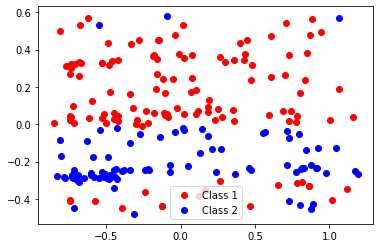

In [41]:
# We will take the Silhouette index in this case. It predicts that optimal number of cluster is 2
model = KMedoids(2, random_state=0)
model.fit(df2)
y = model.predict(df2)
df3 = pd.DataFrame(yhat,columns=["y"])
X = pd.concat([df2,df3],axis = 1)

#2D PCA Plots
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

## Single Linkage Algorithm

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

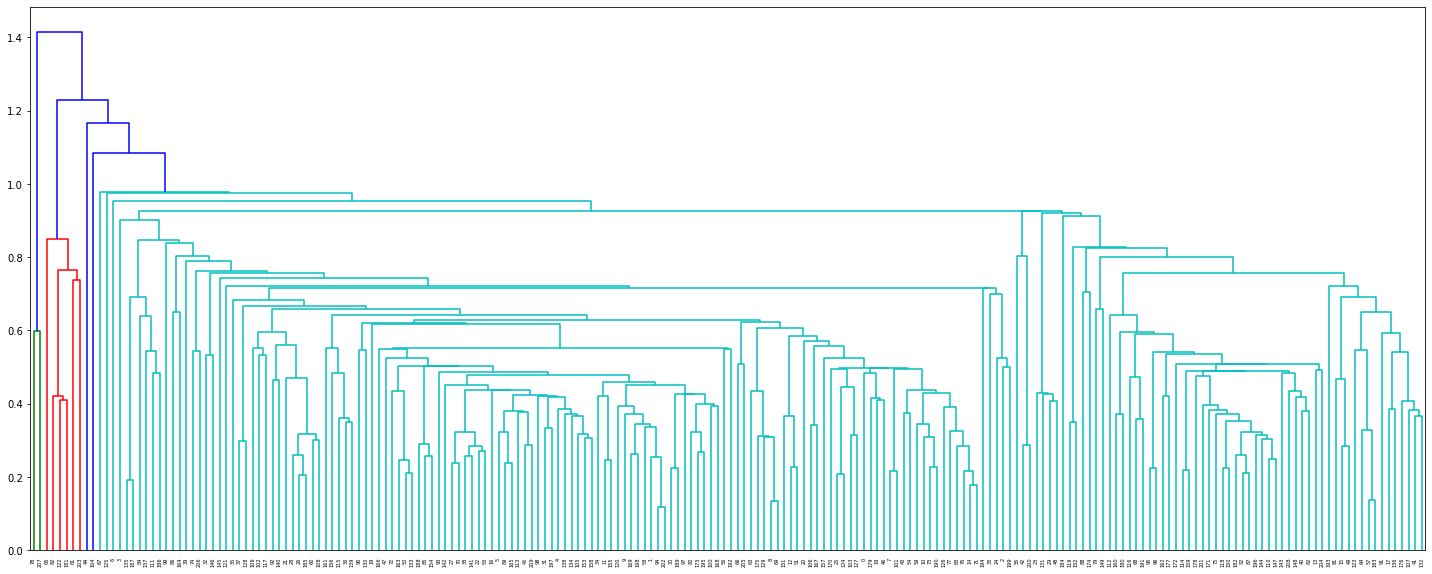

In [43]:
Z = linkage(data, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

## Complete Linkage 

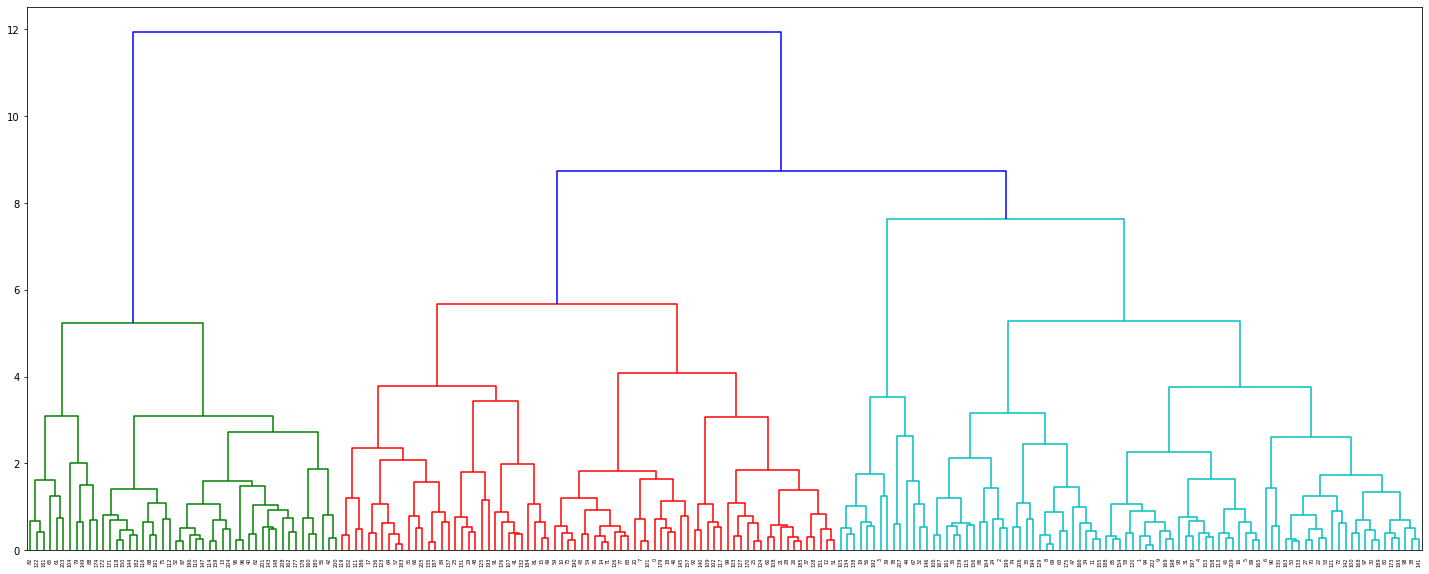

In [44]:
Z = linkage(data, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

## DBSCAN 
I will evaluate epsilon value using the method mentioned in the following paper: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf. 
In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced and select that as epsilon

In [45]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set()

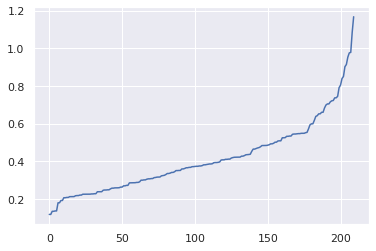

In [46]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [51]:
#Take epsilon = 0.6
m = DBSCAN(eps=0.6, min_samples=5)
m.fit(df2)
y = m.labels_
np.unique(y)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

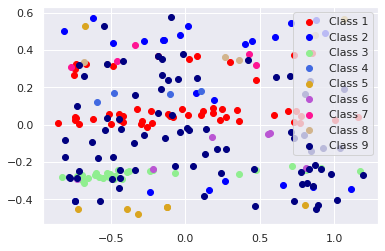

In [54]:
#2D PCA Plots
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 4', c='royalblue')
plt.scatter(transformed[y==4][0], transformed[y==4][1], label='Class 5', c='goldenrod')
plt.scatter(transformed[y==5][0], transformed[y==5][1], label='Class 6', c='mediumorchid')
plt.scatter(transformed[y==6][0], transformed[y==6][1], label='Class 7', c='deeppink')
plt.scatter(transformed[y==7][0], transformed[y==7][1], label='Class 8', c='tan')
plt.scatter(transformed[y==-1][0], transformed[y==-1][1], label='Class 9', c='navy')

plt.legend()
plt.show()

## Optics
Again here we will use the exact same selection criteria as DBSCAN. Hence our epsilon value will be = 0.6

In [55]:
from sklearn.cluster import OPTICS

In [56]:
clustering = OPTICS(min_samples=5, max_eps=0.6).fit(df2)
y = clustering.labels_
np.unique(y)

array([-1,  0,  1,  2,  3,  4,  5])

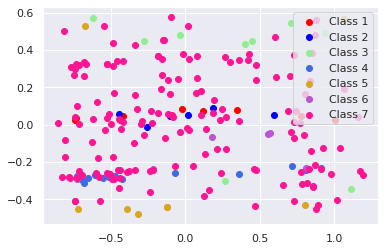

In [58]:
#2D PCA Plots
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 4', c='royalblue')
plt.scatter(transformed[y==4][0], transformed[y==4][1], label='Class 5', c='goldenrod')
plt.scatter(transformed[y==5][0], transformed[y==5][1], label='Class 6', c='mediumorchid')
plt.scatter(transformed[y==-1][0], transformed[y==-1][1], label='Class 7', c='deeppink')
#plt.scatter(transformed[y==7][0], transformed[y==7][1], label='Class 8', c='tan')
#plt.scatter(transformed[y==-1][0], transformed[y==-1][1], label='Class 9', c='navy')

plt.legend()
plt.show()

## Comparison:
Using EM algorithm

In [62]:
model = GaussianMixture(n_components=3, init_params='random')
model.fit(df2)
ypred = model.predict(df2)
y = df.iloc[:,[7]].values

In [66]:
ytest = []
for i in range(len(y)):
  ytest = ytest + [y[i][0]]
  

In [68]:
ytest = np.subtract(ytest,1)

In [72]:
#Computing Purity
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
purity_score(ytest,ypred)

0.6571428571428571

In [73]:
#Computing Normalized Mutual Information
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(ytest,ypred)

0.4635463915721868